# Student's t-test

In [0]:
import scipy

import numpy as np
import pandas as pd

from statsmodels.stats.weightstats import *

In [0]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Treatment effects of methylphenidate

As part of studies of the effectiveness of the drug methylphenidate, 24 patients with attention deficit hyperactivity disorder take either methylphenidate or placebo for a week. At the end of the week, each patient was tested for the ability to suppress impulsive behavioral responses. After each second course, each subject passed the second test. It is required to evaluate the effect of the drug.

Pearson D.A, Santos C.W., Casat C.D., et al. (2004). Treatment effects of methylphenidate on cognitive functioning in children with mental retardation and ADHD. Journal of the American Academy of Child and Adolescent Psychiatry, 43(6), 677–685.

In [0]:
data = pd.read_csv('https://raw.githubusercontent.com/OzmundSedler/100-Days-Of-ML-Code/master/week_11/datasets/ADHD.txt', sep = ' ', header = 0)
data.columns = ['Placebo', 'Methylphenidate']

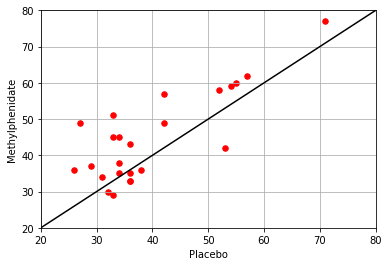

In [0]:
data.plot.scatter('Placebo', 'Methylphenidate', c = 'r', s = 30)
pylab.grid()
pylab.plot(range(100), c = 'black')
pylab.xlim((20, 80))
pylab.ylim((20, 80))
pylab.show()

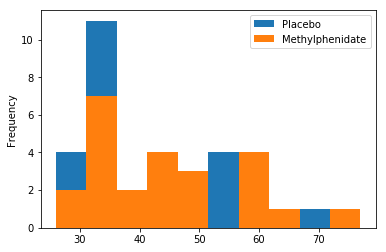

In [0]:
data.plot.hist()
pylab.show()

## One-tailed Students test

Based on the fact that the ability to suppress impulsive behavioral reactions is measured on a scale of [0, 100], it can be assumed that, with a good calibration of the test, the average ability to suppress reactions in a population is 50. Then, to test the hypothesis that patients in the sample, on average, they do worse with suppressing impulsive reactions (need treatment), let's check that their ability to suppress reactions is different from the average (not equal to 50).

$ H_0 \ colon $ the average value of the ability to suppress impulsive behavioral reactions is 50.

$ H_1 \ colon $ is not equal.

In [0]:
stats.ttest_1samp(data.Placebo, 50.0)

Ttest_1sampResult(statistic=-4.438003341905128, pvalue=0.00018894293251080175)

In [0]:
print (f"95%% confidence interval: {zconfint(data.Placebo)}")

95%% confidence interval: (35.223272709859756, 44.276727290140244)


## Two-tailed Student's test (independent samples)

In order to use the two-tailed student's test, we need to ensure that the distributions in the samples do not significantly differ from normal ones. TO do that, let's plot Q-Q plot.

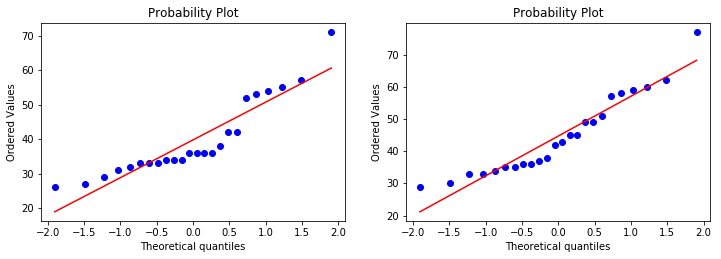

In [0]:
pylab.figure(figsize=(12,8))
pylab.subplot(2,2,1)
stats.probplot(data.Placebo, dist="norm", plot=pylab)
pylab.subplot(2,2,2)
stats.probplot(data.Methylphenidate, dist="norm", plot=pylab)
pylab.show()

Shapiro-Wilk test:

  $ H_0 \ colon $ ability to suppress impulsive reactions distributed normally
 
  $ H_1 \ colon $ is not normal.

In [0]:
W_stat, p_value = stats.shapiro(data.Placebo)
print (f"Shapiro-Wilk normality test, W-statistic: {W_stat:.4f}, p-value: {p_value:.4f}")

Shapiro-Wilk normality test, W-statistic: 0.8575, p-value: 0.0030


In [0]:
W_stat, p_value = stats.shapiro(data.Methylphenidate)
print (f"Shapiro-Wilk normality test, W-statistic: {W_stat:.4f}, p-value: {p_value:.4f}")

Shapiro-Wilk normality test, W-statistic: 0.9164, p-value: 0.0488


Using the Student's test, let's verify the hypothesis of the dereference of the average of two samples.


$ H_0 \ colon $ the average values of the ability to suppress impulsive behavioral reactions are the same for patients taking the drug, and for patients taking placebo.

$ H_1 \ colon $ are not the same.

In [0]:
scipy.stats.ttest_ind(data.Placebo, data.Methylphenidate, equal_var = False)

Ttest_indResult(statistic=-1.4521635018159091, pvalue=0.1532919977404709)

In [0]:
cm = CompareMeans(DescrStatsW(data.Methylphenidate), DescrStatsW(data.Placebo))
print (f"95%% confidence interval: {cm.tconfint_diff(usevar='unequal')}")

95%% confidence interval: (-1.9159267979412196, 11.832593464607891)


## Two-tailed Student's test (dependent samples)

In order to use Student's criteria for related samples, let's verify that the distribution of pairwise differences is not significantly different from normal.

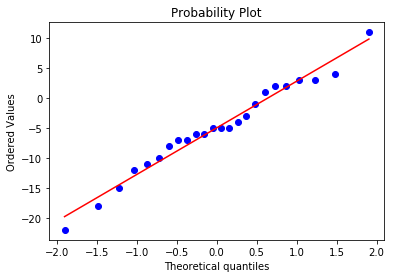

In [0]:
stats.probplot(data.Placebo - data.Methylphenidate, dist = "norm", plot = pylab)
pylab.show()

Shapiro-Wilk test:

$ H_0 \ colon $ pairwise differences are normally distributed.

$ H_1 \ colon $ is not normal.

In [0]:
W_stat, p_value = stats.shapiro(data.Placebo - data.Methylphenidate)
print (f"Shapiro-Wilk normality test, W-statistic: {W_stat:.4f}, p-value: {p_value:.4f}")

Shapiro-Wilk normality test, W-statistic: 0.9798, p-value: 0.8923


Student's test:

$ H_0 \ colon $ the average values of the ability to suppress impulsive behavioral reactions are the same for patients taking the drug, and for patients taking placebo.

$ H_1 \ colon $ are not the same.

In [0]:
stats.ttest_rel(data.Methylphenidate, data.Placebo)

Ttest_relResult(statistic=3.2223624451230406, pvalue=0.003771488176381471)

In [0]:
print (f"95%% confidence interval: {DescrStatsW(data.Methylphenidate - data.Placebo).tconfint_mean()}")

95%% confidence interval: (1.7752357893192365, 8.14143087734743)
